In [87]:
import pandas as pd
import numpy as np

In [88]:
odf = pd.read_csv('titanic.csv')
df = odf

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Question 3

#Analysis


In [90]:
missing_values = df.isna().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We observer here that Age, Cabin and Embarked contain missing values

Age: in the case of Age we see 177 missing values out of 891 Datapoints
there are 2 ways of going about cleaning and preprocessing it, we can either drop the entire row itself or we could repace the the value with a measure of central tendancy
since 177 values is a substancial amount, We can look into replacing he values

Cabin: Since 687 values out of 891 value of Cabin are na, we can drop the whole column since it doesnt provie any valuable data

Embarked: Since a very low number of 2 values are na in Embarked we can drop these rows since there will be negligible variance in the dataset

In [91]:
duplicate_count = df.duplicated(subset=['Name', 'Ticket']).sum()

print( duplicate_count)


0


Here we observer that there arent any duplicate values in Name and Ticket


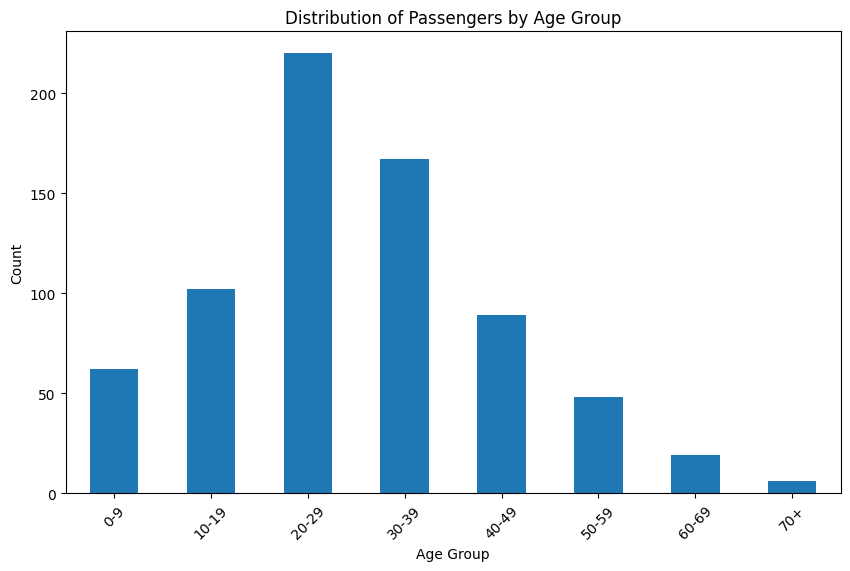

In [92]:
import matplotlib.pyplot as plt

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(10, 6))
df['Age_group'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Passengers by Age Group')
plt.xticks(rotation=45)
plt.show()


On plotting the Age column, we observer it to be a positive skewed normal plot
Since it is skewed, we can take median as the central tendancy since it will best represent the majority of the population even in the presence of a skew

#Cleaninig

In [93]:
median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True) #Fill Age with median


In [94]:
df.drop('Cabin', axis=1, inplace=True)


In [95]:
df = df.dropna(subset=['Embarked'])


In [96]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,20-29
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,10-19
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,20-29


# PREPROCESING


We can observe that PassengerID, Name and Ticket do not provide us with significant data, Hence we can drop them

In [97]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)


<ipython-input-97-ddcc6fb19566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('PassengerId', axis=1, inplace=True)
<ipython-input-97-ddcc6fb19566>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Name', axis=1, inplace=True)
<ipython-input-97-ddcc6fb19566>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Ticket', axis=1, inplace=True)


Further, we observe that SibSp and Parch can be combined to give FamilyCount which is the total number of family members

In [98]:
df['FamilyCount'] = df['SibSp'] + df['Parch']
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)


<ipython-input-98-dab6abffe879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FamilyCount'] = df['SibSp'] + df['Parch']
<ipython-input-98-dab6abffe879>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('SibSp', axis=1, inplace=True)
<ipython-input-98-dab6abffe879>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Parch', axis=1, inplace=True)


In [99]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_group,FamilyCount
0,0,3,male,22.0,7.2500,S,20-29,1
1,1,1,female,38.0,71.2833,C,30-39,1
2,1,3,female,26.0,7.9250,S,20-29,0
3,1,1,female,35.0,53.1000,S,30-39,1
4,0,3,male,35.0,8.0500,S,30-39,0


## Question 9


In [109]:
fare_survived = odf[odf['Survived'] == 1]['Fare']
fare_not_survived = odf[odf['Survived'] == 0]['Fare']

In [110]:
fare_survived


1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64

In [111]:
fare_not_survived

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64

In [112]:
from scipy import stats

In [113]:
t_statistic, p_value = stats.ttest_ind(fare_survived, fare_not_survived, equal_var=False)

In [114]:
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 6.839099259085254
P-Value: 2.6993323503141236e-11


In [122]:
  alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Fare has a significant impact on survival.")
else:
    print("Fail to reject the null hypothesis: Fare does not have a significant impact on survival.")


Reject the null hypothesis: Fare has a significant impact on survival.


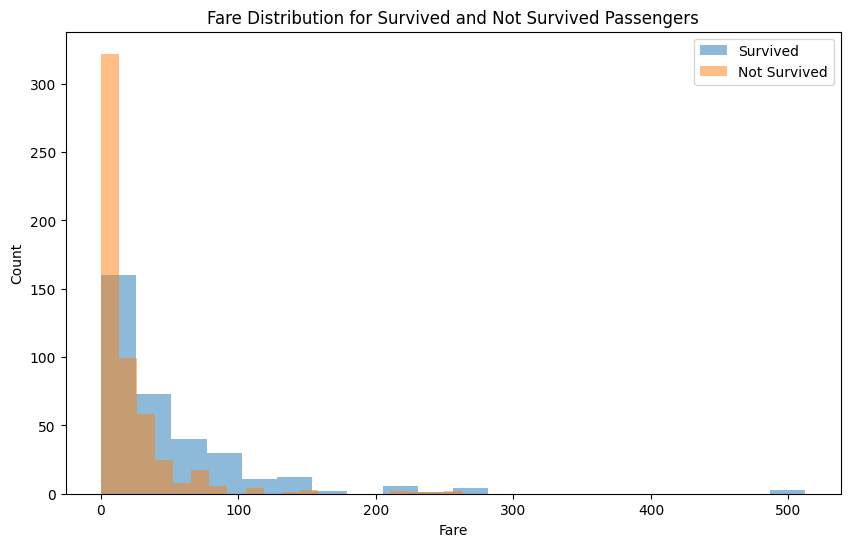

## Question 10

In [121]:
std_dev_survived = fare_survived.std()
std_dev_not_survived = fare_not_survived.std()
n1 = len(fare_survived)
n2 = len(fare_not_survived)

standard_error = np.sqrt((std_dev_survived**2 / n1) + (std_dev_not_survived**2 / n2))
print(standard_error)
critical_value = 1.96

margin_of_error = critical_value * standard_error

print("Margin of Error:", margin_of_error)


3.8422487701411083
Margin of Error: 7.530807589476572
